In [1]:
import pandas as pd
import numpy as np
from skbio import OrdinationResults
import matplotlib.pyplot as plt
from scipy.stats import ranksums, kruskal
from statsmodels.stats.multitest import multipletests
import seaborn as sns

ModuleNotFoundError: No module named 'skbio'

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import ranksums, kruskal
from statsmodels.stats.multitest import multipletests
import seaborn as sns

In [2]:
%matplotlib inline

In [3]:
import qiime2
import warnings
warnings.filterwarnings('ignore')

In [4]:
from qiime2 import Artifact

In [5]:
# Load meta
meta_df= pd.read_csv('./results/meta_df.csv', index_col=0)

In [14]:
# Load genus tables
#PSC Seren
PSC_genus_seren = pd.read_csv('./results/PSC_genus_seren.csv', index_col=0)

#PSC Stool
PSC_genus_stool = pd.read_csv('./results/PSC_genus_stool.csv', index_col=0)


#BSPSPC Seren
BSPSPC_genus_seren = pd.read_csv('./results/BSPSPC_genus_seren.csv', index_col=0)


#BSPSPC Stool
BSPSPC_genus_stool = pd.read_csv('./results/BSPSPC_genus_stool.csv', index_col=0)


In [15]:
PSC_genus_seren.index = PSC_genus_seren.index + "_srn"
PSC_genus_stool.index = PSC_genus_stool.index + "_stl"

BSPSPC_genus_seren.index = BSPSPC_genus_seren.index + "_srn"
BSPSPC_genus_stool.index = BSPSPC_genus_stool.index + "_stl"

# Merging genus tables

## creating biom tables

In [16]:
PSC_genus_seren = PSC_genus_seren.drop(columns = ['phase'], axis=1)
PSC_genus_stool= PSC_genus_stool.drop(columns = ['phase'], axis=1)

BSPSPC_genus_seren= BSPSPC_genus_seren.drop(columns = ['phase'], axis=1)
BSPSPC_genus_stool= BSPSPC_genus_stool.drop(columns = ['phase'], axis=1)

In [17]:
#create biom objects
biom_PSC_genus_seren = qiime2.Artifact.import_data('FeatureTable[Frequency]', PSC_genus_seren)
biom_PSC_genus_stool = qiime2.Artifact.import_data('FeatureTable[Frequency]', PSC_genus_stool)

biom_BSPSPC_genus_seren = qiime2.Artifact.import_data('FeatureTable[Frequency]', BSPSPC_genus_seren)
biom_BSPSPC_genus_stool = qiime2.Artifact.import_data('FeatureTable[Frequency]', BSPSPC_genus_stool)

In [18]:
#save bioms as qza
biom_PSC_genus_seren.save('./results/biom_PSC_genus_seren.qza')
biom_PSC_genus_stool.save('./results/biom_PSC_genus_stool.qza')

biom_BSPSPC_genus_seren.save('./results/biom_BSPSPC_genus_seren.qza')
biom_BSPSPC_genus_stool.save('./results/biom_BSPSPC_genus_stool.qza')

'./results/biom_BSPSPC_genus_stool.qza'

In [19]:
PSC_genus_seren = PSC_genus_seren.T.rename_axis('#OTUID')
PSC_genus_stool = PSC_genus_stool.T.rename_axis('#OTUID')
BSPSPC_genus_seren = BSPSPC_genus_seren.T.rename_axis('#OTUID')
BSPSPC_genus_stool = BSPSPC_genus_stool.T.rename_axis('#OTUID')

In [20]:
# Define file paths for saving the text files
file_paths = ['./results/PSC_genus_seren.txt', './results/PSC_genus_stool.txt', './results/BSPSPC_genus_seren.txt', './results/BSPSPC_genus_stool.txt']

# Save each DataFrame as a text file
for df, file_path in zip([PSC_genus_seren, PSC_genus_stool, BSPSPC_genus_seren, BSPSPC_genus_stool], file_paths):
    df.to_csv(file_path, sep='\t', index=True)

In [21]:
!biom convert -i ./results/PSC_genus_seren.txt -o ./results/PSC_genus_seren.biom --table-type="OTU table" --to-hdf5

In [22]:
!biom convert -i ./results/PSC_genus_stool.txt -o ./results/PSC_genus_stool.biom --table-type="OTU table" --to-hdf5

In [23]:
!biom convert -i ./results/BSPSPC_genus_seren.txt -o ./results/BSPSPC_genus_seren.biom --table-type="OTU table" --to-hdf5

In [24]:
!biom convert -i ./results/BSPSPC_genus_stool.txt -o ./results/BSPSPC_genus_stool.biom --table-type="OTU table" --to-hdf5

## transform taxonomy files for biom

In [25]:
!biom add-metadata -i ./results/PSC_genus_seren.biom -o ./results/PSC_genus_seren_taxonomy.biom --observation-metadata-fp ./results/PSC_tax_seren.tsv --sc-separated taxonomy

In [26]:
!biom add-metadata -i ./results/PSC_genus_stool.biom -o ./results/PSC_genus_stool_taxonomy.biom --observation-metadata-fp ./results/PSC_tax_stool.tsv --sc-separated taxonomy

In [27]:
!biom add-metadata -i ./results/BSPSPC_genus_seren.biom -o ./results/BSPSPC_genus_seren_taxonomy.biom --observation-metadata-fp ./results/BSPSPC_tax_seren.tsv --sc-separated taxonomy

In [28]:
!biom add-metadata -i ./results/BSPSPC_genus_stool.biom -o ./results/BSPSPC_genus_stool_taxonomy.biom --observation-metadata-fp ./results/BSPSPC_tax_stool.tsv --sc-separated taxonomy

## preparing .qza files

In [29]:
!qiime tools import \
  --input-path ./results/PSC_genus_seren_taxonomy.biom \
  --type 'FeatureTable[Frequency]' \
  --input-format BIOMV210Format \
  --output-path ./results/PSC_genus_seren_taxonomy.qza

Imported ./results/PSC_genus_seren_taxonomy.biom as BIOMV210Format to ./results/PSC_genus_seren_taxonomy.qza


In [30]:
!qiime tools import \
  --input-path ./results/PSC_genus_stool_taxonomy.biom \
  --type 'FeatureTable[Frequency]' \
  --input-format BIOMV210Format \
  --output-path ./results/PSC_genus_stool_taxonomy.qza

Imported ./results/PSC_genus_stool_taxonomy.biom as BIOMV210Format to ./results/PSC_genus_stool_taxonomy.qza


In [31]:
!qiime tools import \
  --input-path ./results/BSPSPC_genus_seren_taxonomy.biom \
  --type 'FeatureTable[Frequency]' \
  --input-format BIOMV210Format \
  --output-path ./results/BSPSPC_genus_seren_taxonomy.qza

Imported ./results/BSPSPC_genus_seren_taxonomy.biom as BIOMV210Format to ./results/BSPSPC_genus_seren_taxonomy.qza


In [32]:
!qiime tools import \
  --input-path ./results/BSPSPC_genus_stool_taxonomy.biom \
  --type 'FeatureTable[Frequency]' \
  --input-format BIOMV210Format \
  --output-path ./results/BSPSPC_genus_stool_taxonomy.qza

Imported ./results/BSPSPC_genus_stool_taxonomy.biom as BIOMV210Format to ./results/BSPSPC_genus_stool_taxonomy.qza


# Normalization

In [33]:
# Normalization
!qiime feature-table rarefy \
  --i-table ./results/BSPSPC_genus_seren_taxonomy.qza \
  --p-sampling-depth 5000 \
  --o-rarefied-table ./results/norm_BSPSPC_genus_seren_taxonomy.qza

Saved FeatureTable[Frequency] to: ./results/norm_BSPSPC_genus_seren_taxonomy.qza


In [34]:
# Normalization
!qiime feature-table rarefy \
  --i-table ./results/BSPSPC_genus_stool_taxonomy.qza \
  --p-sampling-depth 10000 \
  --o-rarefied-table ./results/norm_BSPSPC_genus_stool_taxonomy.qza

Saved FeatureTable[Frequency] to: ./results/norm_BSPSPC_genus_stool_taxonomy.qza


In [35]:
# Normalization
!qiime feature-table rarefy \
  --i-table ./results/PSC_genus_seren_taxonomy.qza \
  --p-sampling-depth 2500 \
  --o-rarefied-table ./results/norm_PSC_genus_seren_taxonomy.qza

Saved FeatureTable[Frequency] to: ./results/norm_PSC_genus_seren_taxonomy.qza


In [36]:
# Normalization
!qiime feature-table rarefy \
  --i-table ./results/PSC_genus_stool_taxonomy.qza \
  --p-sampling-depth 10000 \
  --o-rarefied-table ./results/norm_PSC_genus_stool_taxonomy.qza

Saved FeatureTable[Frequency] to: ./results/norm_PSC_genus_stool_taxonomy.qza


# merging

In [37]:
!qiime feature-table merge \
  --i-tables ./results/norm_PSC_genus_seren_taxonomy.qza \
  --i-tables ./results/norm_PSC_genus_stool_taxonomy.qza \
  --i-tables ./results/norm_BSPSPC_genus_seren_taxonomy.qza \
  --i-tables ./results/norm_BSPSPC_genus_stool_taxonomy.qza \
  --o-merged-table ./results/norm_merged_genus_abundances.qza

Saved FeatureTable[Frequency] to: ./results/norm_merged_genus_abundances.qza


In [5]:
# Load rarefied ab table from the Qiime artifact
ab = Artifact.load('./results/norm_merged_genus_abundances.qza')

# Convert the PCoA results to a pandas DataFrame
ab = ab.view(pd.DataFrame)

In [6]:
ab.to_csv('./results/norm_merged_genus_abundances.csv', index=True)

In [40]:
ab = pd.read_csv('./results/norm_merged_genus_abundances.csv', index_col=0)

In [41]:
ab

,C__Acidobacteria_Gp4,C__Actinobacteria,C__Alphaproteobacteria,C__Armatimonadetes_gp5,C__Bacilli,C__Betaproteobacteria,C__Candidatus_Cloacamonas,C__Candidatus_Hydrogenedens,C__Chloroflexia,C__Clostridia,...,P__Cyanobacteria.Chloroplast,P__Firmicutes,P__Latescibacteria,P__Microgenomates,P__Parcubacteria,P__Planctomycetes,P__Proteobacteria,P__SR1,P__Verrucomicrobia,Unassigned
2020-023_PSC_0001_srn,0.0,36.0,134.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,23.0,0.0,74.0,0.0,35.0,0.0
2020-023_PSC_0006_srn,0.0,0.0,8.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,78.0,0.0,27.0,0.0,0.0,11.0
2020-023_PSC_0007_srn,0.0,0.0,17.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,15.0,2.0,10.0,0.0,0.0,2.0
2020-023_PSC_0010_srn,0.0,26.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,22.0,0.0,0.0,0.0,0.0,0.0
2020-023_PSC_0015_srn,0.0,0.0,4.0,0.0,0.0,10.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,90.0,2.0,29.0,0.0,0.0,20.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-023_SPC_0189_stl,0.0,0.0,44.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,15.0,0.0,0.0,0.0,0.0,33.0,0.0,0.0,0.0
2020-023_SPC_0409_stl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,375.0,0.0,0.0,0.0,0.0,3.0,0.0,0.0,0.0
2020-023_SPC_0515_stl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,62.0,...,0.0,22.0,0.0,0.0,0.0,0.0,84.0,0.0,0.0,0.0
2020-023_SPC_0726_stl,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,59.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


# Filtration

In [42]:
# Low count filter: 	minimum count 4 in 20% of samples
# Calculate the count threshold for the low count filter
min_count_threshold = 4
min_samples_threshold = len(ab) * 0.1

# Select taxa with count >= min_count_threshold in at least min_samples_threshold samples
ab = ab.loc[:, (ab >= min_count_threshold).sum(axis=0) >= min_samples_threshold]


In [43]:
ab

,C__Alphaproteobacteria,C__Deltaproteobacteria,C__Gammaproteobacteria,F__Bacillariophyta,F__Clostridiales_Incertae_Sedis_XII,F__Coriobacteriaceae,F__Cryptomonadaceae,F__Enterobacteriaceae,F__Erysipelotrichaceae,F__Lachnospiraceae,...,K__Bacteria,O__Actinomycetales,O__Bacteroidales,O__Burkholderiales,O__Clostridiales,P__Bacteroidetes,P__Candidatus_Saccharibacteria,P__Firmicutes,P__Parcubacteria,P__Proteobacteria
2020-023_PSC_0001_srn,134.0,19.0,34.0,9.0,0.0,0.0,0.0,0.0,0.0,0.0,...,339.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,23.0,74.0
2020-023_PSC_0006_srn,8.0,15.0,53.0,0.0,0.0,0.0,27.0,0.0,0.0,227.0,...,292.0,4.0,0.0,0.0,0.0,22.0,0.0,0.0,78.0,27.0
2020-023_PSC_0007_srn,17.0,0.0,5.0,10.0,0.0,0.0,8.0,7.0,0.0,21.0,...,129.0,2.0,0.0,0.0,0.0,6.0,12.0,0.0,15.0,10.0
2020-023_PSC_0010_srn,0.0,0.0,0.0,53.0,0.0,0.0,105.0,0.0,0.0,0.0,...,362.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,22.0,0.0
2020-023_PSC_0015_srn,4.0,0.0,9.0,18.0,0.0,0.0,0.0,8.0,0.0,50.0,...,126.0,0.0,0.0,0.0,7.0,13.0,5.0,0.0,90.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-023_SPC_0189_stl,44.0,0.0,0.0,0.0,0.0,37.0,0.0,0.0,2.0,333.0,...,4.0,0.0,0.0,0.0,1690.0,0.0,0.0,15.0,0.0,33.0
2020-023_SPC_0409_stl,0.0,0.0,0.0,0.0,0.0,17.0,0.0,0.0,8.0,499.0,...,1.0,0.0,0.0,0.0,147.0,0.0,0.0,375.0,0.0,3.0
2020-023_SPC_0515_stl,0.0,0.0,0.0,0.0,0.0,16.0,0.0,56.0,55.0,747.0,...,68.0,0.0,0.0,0.0,606.0,0.0,1.0,22.0,0.0,84.0
2020-023_SPC_0726_stl,0.0,0.0,0.0,0.0,0.0,2.0,0.0,0.0,15.0,404.0,...,2.0,0.0,0.0,0.0,40.0,0.0,0.0,59.0,0.0,0.0


In [44]:
# Low variance filter: 	5% based on inter-quantile rang
# Calculate the 10th and 90th percentile for each taxon
percentiles = ab.quantile([0.05, 0.95])

# Calculate the inter-quantile range (IQR) for each taxon
iqr = percentiles.loc[0.95] - percentiles.loc[0.05]

# Filter out taxa with IQR < 5% of the range
variance_threshold = 0.1 * (ab.max() - ab.min())
ab = ab.loc[:, iqr >= variance_threshold]

In [45]:
ab

,C__Alphaproteobacteria,C__Deltaproteobacteria,F__Clostridiales_Incertae_Sedis_XII,F__Coriobacteriaceae,F__Cryptomonadaceae,F__Enterobacteriaceae,F__Erysipelotrichaceae,F__Lachnospiraceae,F__Porphyromonadaceae,F__Ruminococcaceae,...,G__Streptococcus,G__Subdoligranulum,G__Sutterella,G__Veillonella,K__Bacteria,O__Bacteroidales,O__Clostridiales,P__Firmicutes,P__Parcubacteria,P__Proteobacteria
2020-023_PSC_0001_srn,134.0,19.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,66.0,...,0.0,0.0,0.0,0.0,339.0,0.0,0.0,0.0,23.0,74.0
2020-023_PSC_0006_srn,8.0,15.0,0.0,0.0,27.0,0.0,0.0,227.0,0.0,0.0,...,0.0,16.0,0.0,0.0,292.0,0.0,0.0,0.0,78.0,27.0
2020-023_PSC_0007_srn,17.0,0.0,0.0,0.0,8.0,7.0,0.0,21.0,0.0,1.0,...,12.0,11.0,0.0,0.0,129.0,0.0,0.0,0.0,15.0,10.0
2020-023_PSC_0010_srn,0.0,0.0,0.0,0.0,105.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,362.0,0.0,0.0,0.0,22.0,0.0
2020-023_PSC_0015_srn,4.0,0.0,0.0,0.0,0.0,8.0,0.0,50.0,0.0,0.0,...,0.0,0.0,0.0,0.0,126.0,0.0,7.0,0.0,90.0,29.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2020-023_SPC_0189_stl,44.0,0.0,0.0,37.0,0.0,0.0,2.0,333.0,0.0,599.0,...,4.0,115.0,0.0,0.0,4.0,0.0,1690.0,15.0,0.0,33.0
2020-023_SPC_0409_stl,0.0,0.0,0.0,17.0,0.0,0.0,8.0,499.0,0.0,473.0,...,0.0,110.0,0.0,0.0,1.0,0.0,147.0,375.0,0.0,3.0
2020-023_SPC_0515_stl,0.0,0.0,0.0,16.0,0.0,56.0,55.0,747.0,0.0,488.0,...,156.0,202.0,0.0,9.0,68.0,0.0,606.0,22.0,0.0,84.0
2020-023_SPC_0726_stl,0.0,0.0,0.0,2.0,0.0,0.0,15.0,404.0,248.0,605.0,...,38.0,50.0,477.0,60.0,2.0,0.0,40.0,59.0,0.0,0.0


In [46]:
ab.to_csv('./results/norm_merged_genus_abundances_filtered.csv', index=True)

# relative abundancies

In [38]:
!qiime feature-table relative-frequency \
--i-table ./results/norm_merged_genus_abundances.qza \
--o-relative-frequency-table ./results/rel_norm_merged_genus_abundances.qza

Saved FeatureTable[RelativeFrequency] to: ./results/rel_norm_merged_genus_abundances.qza


# abundance barplot 

In [5]:
# Load rarefied and relative ab table from the Qiime artifact
rel_ab = Artifact.load('./results/rel_norm_merged_genus_abundances.qza')

# Convert the PCoA results to a pandas DataFrame
rel_ab = rel_ab.view(pd.DataFrame)

In [6]:
# Convert row names into a separate column and reset row names
rel_ab['sample_id'] = rel_ab.index
rel_ab.reset_index(drop=True, inplace=True)
# Pivot the dataframe
genus_ab = pd.melt(rel_ab , id_vars=['sample_id'], var_name='Genus', value_name='Abundance')

In [7]:
genus_ab['Material'] = np.where(genus_ab['sample_id'].str.contains('srn'), 'seren', 'stool')


In [8]:
genus_ab['Group'] = np.where(genus_ab['sample_id'].str.contains('PSC'), 'PSC', 'BSPSPC')

In [9]:
genus_ab['Combined'] = genus_ab['Group'] + '_' + genus_ab['Material']

In [10]:
#Create table for diagnosis
pivot_data = genus_ab.pivot_table(index='Combined', columns='Genus', values='Abundance', fill_value=0)
pivot_data

Genus,C__Acidobacteria_Gp4,C__Actinobacteria,C__Alphaproteobacteria,C__Armatimonadetes_gp5,C__Bacilli,C__Betaproteobacteria,C__Candidatus_Cloacamonas,C__Candidatus_Hydrogenedens,C__Chloroflexia,C__Clostridia,...,P__Cyanobacteria.Chloroplast,P__Firmicutes,P__Latescibacteria,P__Microgenomates,P__Parcubacteria,P__Planctomycetes,P__Proteobacteria,P__SR1,P__Verrucomicrobia,Unassigned
Combined,,,,,,,,,,,,,,,,,,,,,
BSPSPC_seren,0.000000,0.000209,0.013764,0.000000,0.000213,0.004969,0.000000,0.000000,0.000000,0.000000,...,0.001996,0.003573,0.000000,3.911111e-04,0.040511,0.000000,0.006133,0.000098,0.000427,0.000000
BSPSPC_stool,0.000000,0.000000,0.002034,0.000000,0.000000,0.000002,0.000000,0.000000,0.000000,0.000334,...,0.000000,0.018062,0.000000,0.000000e+00,0.000000,0.000000,0.004166,0.000000,0.000000,0.000000
PSC_seren,0.000086,0.000655,0.009793,0.000107,0.000745,0.001421,0.000041,0.000003,0.000083,0.000003,...,0.000421,0.001834,0.000055,4.137931e-05,0.023593,0.000179,0.013686,0.000514,0.000214,0.000524
PSC_stool,0.000000,0.000000,0.003024,0.000000,0.000061,0.000004,0.000000,0.000000,0.000000,0.000153,...,0.000000,0.007659,0.000000,3.898635e-07,0.000009,0.000000,0.001892,0.000000,0.000000,0.000000


In [11]:
#Sort table
pivot_data= pivot_data.reindex(pivot_data.mean().sort_values(ascending=False).index, axis=1)

In [12]:
pivot_data.to_csv('./results/relative_abundance_avrg.csv', index = True)

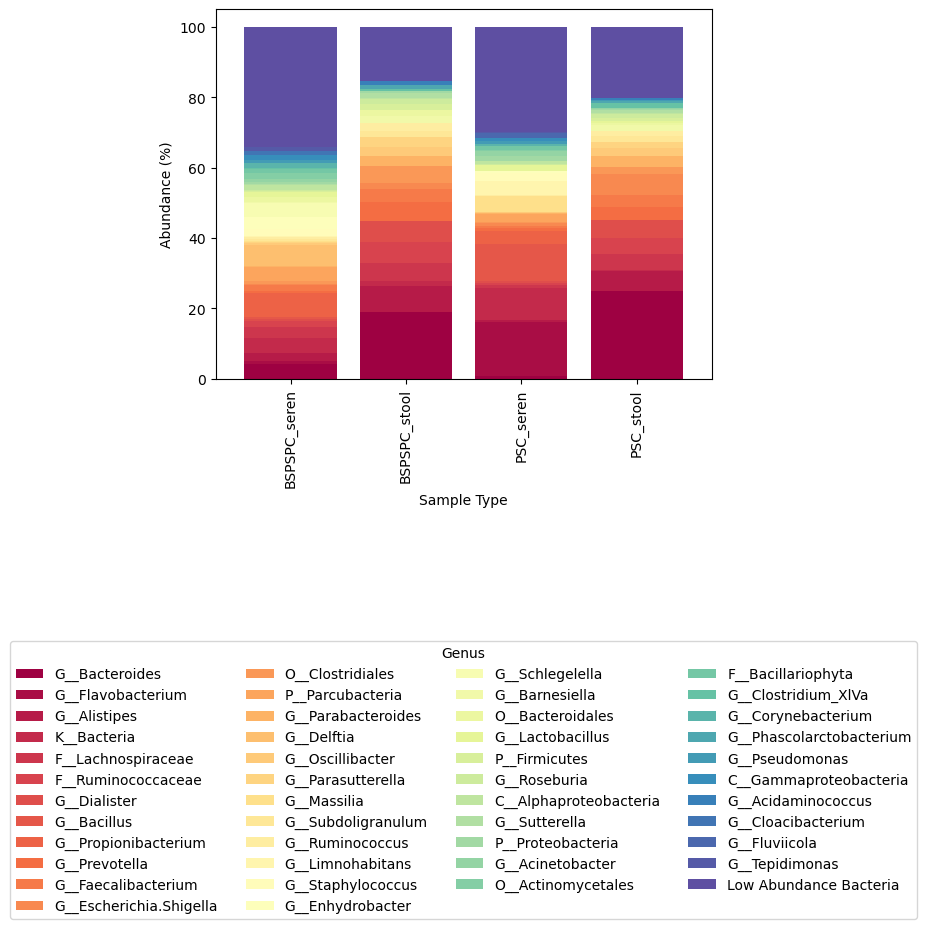

In [46]:
# Calculate proportions for each sample type
cross_tab_prop = pivot_data * 100

# Filter out genera with abundance < 1% and sum them into a single category
low_abundance_threshold = 1
low_abundance_genera = cross_tab_prop.columns[(cross_tab_prop <= low_abundance_threshold).all()]
low_abundance_data = cross_tab_prop[low_abundance_genera].sum(axis=1)
cross_tab_prop.drop(columns=low_abundance_genera, inplace=True)
cross_tab_prop['Low Abundance Bacteria'] = low_abundance_data

ax = cross_tab_prop.plot(kind='bar', stacked=True, cmap='Spectral', width=0.8)

# Customize legend
handles, labels = ax.get_legend_handles_labels()
filtered_handles = []
filtered_labels = []
for handle, label in zip(handles, labels):
    if label in low_abundance_genera:
        filtered_labels.append("Low Abundance Bacteria")
    else:
        filtered_handles.append(handle)
        filtered_labels.append(label)

plt.xlabel('Sample Type')
plt.ylabel('Abundance (%)')
legend = plt.legend(filtered_handles, filtered_labels, title='Genus', loc='upper center', bbox_to_anchor=(0.5, -0.69), ncol=4)
plt.tight_layout()
plt.savefig('./results/stacked_abundance_mock.png', dpi=300, bbox_inches='tight')
plt.show()

In [ ]:
ab = 